# Lab 5 - Logistic Regression and Stochastic Gradient Descent #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1  - Linear Regression Using Gradient Descent ###

In [3]:
data=pd.read_csv("data2.csv")
print(data)

   m_height  d_height
0        58        60
1        62        60
2        60        58
3        64        60
4        67        70
5        70        72


In [4]:
X=data['m_height'].values
y= data['d_height'].values

In [15]:
# Gradient Descent Function
def gradient_descent(X, y, alpha=0.001, epochs=4):
    B1 = 0  # slope
    B0 = 0  # intercept
    n = len(X)
    errors = []
    
    for epoch in range(epochs):
        for i in range(n):
            y_pred = B1 * X[i] + B0
            error = y_pred - y[i]
            B1_gradient = (2/n) * error * X[i]  # Use X[i] instead of x[i]
            B0_gradient = (2/n) * error
            B1 -= alpha * B1_gradient
            B0 -= alpha * B0_gradient
            errors.append(error)
    
    return B1, B0, errors

In [16]:
# Error computation function
def compute_error(y, y_pred):
    return y - y_pred

# MSE computation function
def compute_MSE(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# RMSE computation function
def compute_RMSE(y, y_pred):
    return np.sqrt(compute_MSE(y, y_pred))


In [17]:
# Run Gradient Descent
B1_gradient, B0_gradient, errors = gradient_descent(X, y, alpha=0.001, epochs=4)

In [20]:
# Make predictions based on the model
y_pred = B1_gradient * X + B0_gradient

In [21]:
# Calculate error metrics
mse = compute_MSE(y, y_pred)
rmse = compute_RMSE(y, y_pred)

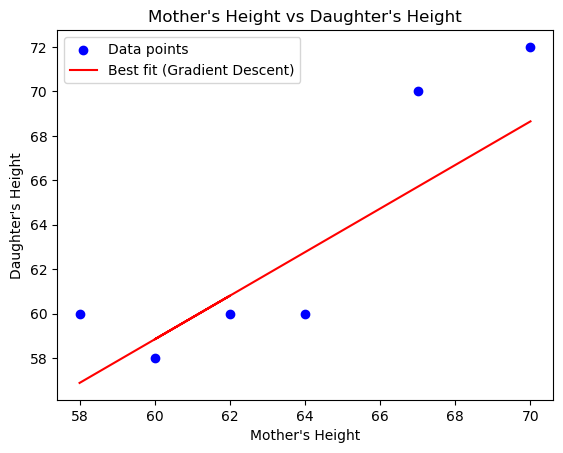

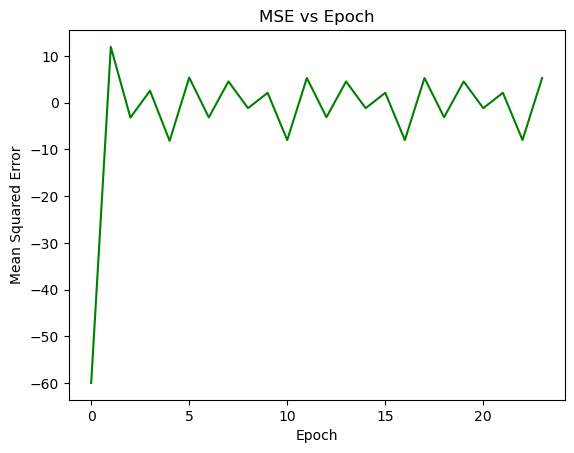

In [22]:
# Plot Daughter height (Y-axis) vs Mother height (X-axis)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Best fit (Gradient Descent)')
plt.xlabel("Mother's Height")
plt.ylabel("Daughter's Height")
plt.title("Mother's Height vs Daughter's Height")
plt.legend()
plt.show()

# Plot error vs epochs
plt.plot(range(len(errors)), errors, color='green')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Epoch")
plt.show()

# Predict a new daughter's height with mother's height = 63
new_mother_height = 63
predicted_daughter_height_gd = B1_gradient * new_mother_height + B0_gradient


In [23]:
# Output the results
print(f"Gradient Descent Coefficients: Slope = {B1_gradient}, Intercept = {B0_gradient}")
print(f"Mean Squared Error (Gradient Descent): {mse}")
print(f"Root Mean Squared Error (Gradient Descent): {rmse}")
print(f"Predicted Daughter's Height for Mother's Height = 63: {predicted_daughter_height_gd}")

Gradient Descent Coefficients: Slope = 0.9804896298074455, Intercept = 0.01752261481060793
Mean Squared Error (Gradient Descent): 8.057621584909986
Root Mean Squared Error (Gradient Descent): 2.8385950019173194
Predicted Daughter's Height for Mother's Height = 63: 61.788369292679675


### Question 2 - Logistic Regression using Gradient Descent ###

Accuracy: 0.5
Probability of passing with 3.5 hours of study: 0.5245127515770894
Probability of passing with 7.5 hours of study: 0.5524698018148744


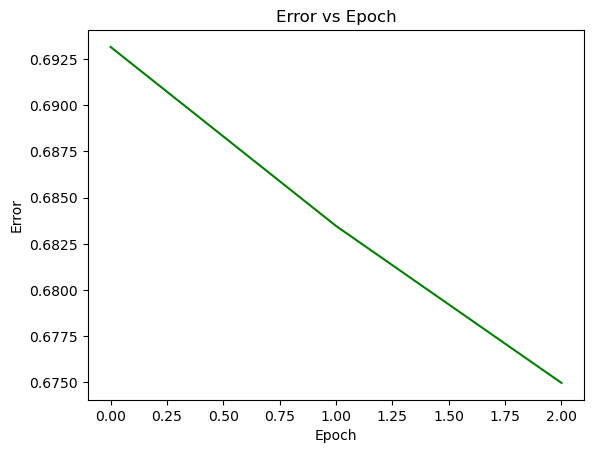

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("study.csv")
X = data['hours'].values
y = data['pass'].values

# Reshape X for use in gradient descent
X = X.reshape(-1, 1)
X_bias = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def logistic_regression_gradient_descent(X, y, alpha=0.01, epochs=3):
    m, n = X.shape
    theta = np.zeros(n)
    errors = []
    
    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        cost = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
        errors.append(cost)
        
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        
    return theta, errors

# Run gradient descent
theta, errors = logistic_regression_gradient_descent(X_bias, y, alpha=0.01, epochs=3)

# Predict function
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Predictions
y_pred = predict(X_bias, theta)

# Compute accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy}")

# Predict probabilities for new data
def predict_probability(hours, theta):
    X_new = np.array([1, hours])  # Add intercept term
    return sigmoid(np.dot(X_new, theta))

prob_3_5_hours = predict_probability(3.5, theta)
prob_7_5_hours = predict_probability(7.5, theta)

print(f"Probability of passing with 3.5 hours of study: {prob_3_5_hours}")
print(f"Probability of passing with 7.5 hours of study: {prob_7_5_hours}")

# Plot error vs epochs
plt.plot(range(len(errors)), errors, color='green')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error vs Epoch")
plt.show()


### Question 3 - Logistic Regression with 2 variables using Gradient Descent ###

Accuracy: 0.6666666666666666
Probability with X1=2.0 and X2=4.0: 1.208578311433167e-70
Probability with X1=3.5 and X2=5.5: 2.5669879188835514e-100


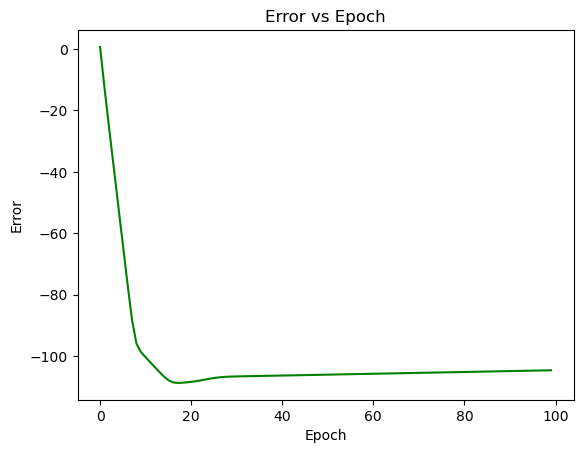

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("data.csv")
X1 = data['X1'].values
X2 = data['X2'].values
y = data['Y'].values

# Prepare data for gradient descent
X = np.vstack((X1, X2)).T
X_bias = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def logistic_regression_gradient_descent(X, y, alpha=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    errors = []
    
    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        cost = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
        errors.append(cost)
        
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        
    return theta, errors

# Run gradient descent
theta, errors = logistic_regression_gradient_descent(X_bias, y, alpha=0.01, epochs=100)

# Predict function
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Predictions
y_pred = predict(X_bias, theta)

# Compute accuracy
accuracy = np.mean(y_pred == (y > 0))  # Convert to binary classes
print(f"Accuracy: {accuracy}")

# Predict probabilities for new data
def predict_probability(X_new, theta):
    X_new_bias = np.array([1, *X_new])  # Add intercept term
    return sigmoid(np.dot(X_new_bias, theta))

# Example predictions
prob_1 = predict_probability([2.0, 4.0], theta)
prob_2 = predict_probability([3.5, 5.5], theta)

print(f"Probability with X1=2.0 and X2=4.0: {prob_1}")
print(f"Probability with X1=3.5 and X2=5.5: {prob_2}")

# Plot error vs epochs
plt.plot(range(len(errors)), errors, color='green')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error vs Epoch")
plt.show()

